In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/%s'
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return


def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)

def rgba(color, alpha):
    return mpl.colors.to_rgba(color, alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [2]:
def makeBlueRedRatio(datalist):
    from figrid.data_container import DataContainer
    ip = {'color':'blue', 'color_cut':'0.60', 'path':['fiducial'], 'post_process':'corr_coef'}
    blues = datalist.getMatching(ip)
    ratiolist = []
    for dc in blues:
        mattr = copy.deepcopy(dc.attrs)
        rmattr = []
        for k in mattr:
            if 'runtime' in k or 'color' == k:
                rmattr.append(k)
        for rm in rmattr:
            del mattr[rm]
        mattr['color'] = 'red'
        reds = datalist.getMatching(mattr)
        if len(reds) > 1:
            print('%d corresponding reds for a blue:'%len(reds))
            print("BLUE ATTRS:")
            print(dc.attrs)
            print("RED ATTRS:")
            for r in reds:
                print(r.attrs)
        if len(reds) == 0:
            print('no reds found')
            print(dc.attrs)
        else:
            reds = reds[0]
            data = [dc.data[0], reds.data[1]/dc.data[1]]
            ratio = DataContainer(data)
            mattr['color'] = 'ratio'
            mattr['post_process'] = 'corr_ratio'
            ratio.update(mattr)
            ratiolist.append(ratio)
    return ratiolist

def cclab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    numerator = '\\mathrm{P}_{%s \\times %s}(%s)'%(name1, name2, fn)
    denom = '\\mathrm{P}_{%s}(%s) \\mathrm{P}_{%s}(%s)'%(name1, fn, name2, fn)
    CORRCOEF = 'r $(%s)$ = $\\frac{%s}{\\sqrt{%s}}$'%(fn, numerator, denom)
    return CORRCOEF

def ccrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = 'r$_{%s}$ $(%s)$ / r$_{%s}$ $(%s)$'%(name1, fn, name2, fn)
    return out

def pkrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    return "P$_{%s}$ $(%s)$ / P$_{%s}$ $(%s)$"%(name1, fn, name2, fn)

In [3]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = '$k$ (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ ($k$) (cMpc/h)$^{-3}$'
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, fontsize = 12, slc = (-1,-1))
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 14, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 14, ha = 'center', va = 'top')
ds.axisLabelArgs(fontsize = 16)
ds.axisLabelArgs('y', ha = 'right', va = 'center')
ds.axisLabelArgs('x', ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            [r'Red $\times$ HI'+'\nCross-Power', r'Blue $\times$ HI'+'\nCross-Power',
            r'All $\times$ HI' + '\nCross-Power', r'Color Ratio'])

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


In [4]:
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ALPHA = 0.65
DRAFT = '/home/cosinga/hicolor_draft/figures/'

In [5]:
corr_coef_ratio = makeBlueRedRatio(ds)
ds.extend(corr_coef_ratio)

# HIXGALAXY Z=0.0

The row values for post_process: ['no key found', 'corr_coef']
The column values for space: ['real', 'redshift']


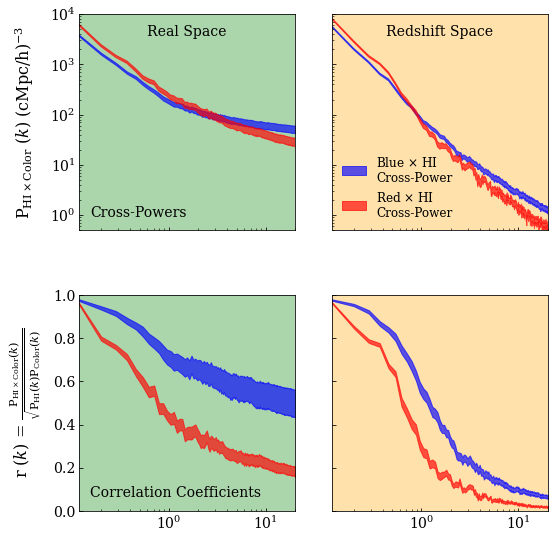

In [12]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'post_process':['no key found', 'corr_coef'],
     'color':['blue', 'red'], 'space':['real', 'redshift']}
XBORDER = [0.25, 0]

fg = ds.figrid('color', 'post_process', 'space', ip)
fg.gspecArgs(hspace = 0.3, wspace = 0.17, xborder = [0.25, 0.25], yborder = [0, 0.25])
fg.rowLabels(['Cross-Powers', 'Correlation Coefficients'])
fg.axisArgs(slc = 'real', facecolor = rgba('green', ALPHA/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'redshift', facecolor = rgba('orange', ALPHA/2), ylim = (.5, 1e4))
fg.axisArgs(slc = 'corr_coef', yscale = 'linear', ylim = (0, 1))
fg.setDefaultTicksParams()
fg.legendArgs(loc = 'lower left', slc = (0, 1))
HIXCOLOR = r"\mathrm{HI} \times \mathrm{Color}"
defpos = fg.defaultAxLabelPos('y')
y1 = 1 - (fg.gspec_args['yborder'][0] + 1.5) / fg.calculateFigsize()[1]
y2 = (fg.gspec_args['yborder'][1] + 2) / fg.calculateFigsize()[1]
# fg.setXLabel(XLAB)
fg.annotateFig(YLAB%HIXCOLOR, [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
fg.annotateFig(cclab('HI', 'Color'), [defpos[0], y2], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
# fg.annotatePanel('z = 0.0', [0.95, 0.95], (1, 1), fontsize = 14, va = 'top', ha = 'right')
fg.autoFill(alpha = ALPHA)
fg.plot()

The row values for post_process: ['no key found', 'corr_ratio']
The column values for : ['no key found']


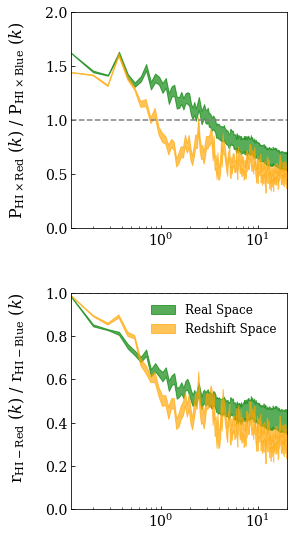

In [13]:
ip = {'post_process':['no key found', 'corr_ratio'], 'color':['ratio'], 'snapshot':99, 'HI_fieldname':['vn', 'hiptl'],
     'space':['real', 'redshift']}
ratfg = ds.figrid('space', 'post_process', '', ip)
ratfg.autoFill(alpha = ALPHA)
ratfg.rowLabels(['', ''])

ratfg.gspecArgs(hspace = 0.3, xborder = XBORDER, yborder = [0, 0.25])

ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.axisArgs(slc = 'corr_ratio', ylim = (0, 1))
ratfg.annotateFig(pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False),
               [defpos[0], y1], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.annotateFig(ccrat('HI-Red', 'HI-Blue'), [defpos[0], y2+.025], fontsize = 16, va = 'center', ha = 'center', rotation = 'vertical')
ratfg.plotOnes()
ratfg.plot()

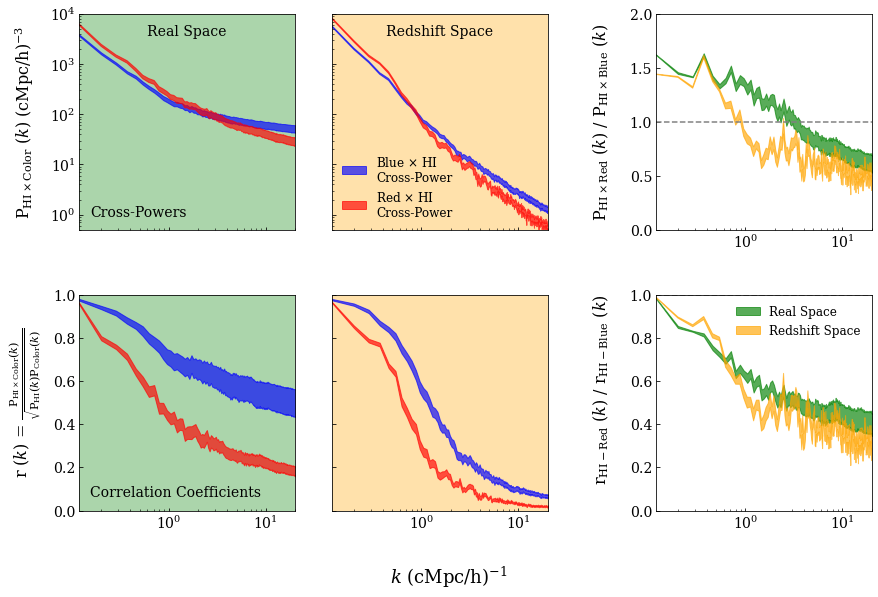

In [14]:
fig = ds.combine([fg, ratfg])
fig.text(0.5, 0, XLAB, ha = 'center', va = 'top', fontsize = 18)
fig.savefig(DRAFT + 'HIxGalaxy_99_corrR_spaceC_color.pdf', bbox_inches = 'tight')
fig.savefig('HIxGalaxy_99_corrR_spaceC_color.png', bbox_inches = 'tight')

In [ ]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 
      'snapshot':99, 'color_cut':'0.60', 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 'space':['real', 'redshift'],
      'censat':'no key found', 'mas':'CICW', 'post_process':'corr_coef',
     'color':['blue', 'red']}
ccfg = ds.figrid('color', 'space', 'snapshot', ip)
ccfg.autoFill(alpha = ALPHA)
ccfg.setPanelsize(3, 2.5)
ccfg.legendArgs(rm_legend = True)
ccfg.axisLabelArgs('both', fontsize = 18)
ccfg.gspecArgs(hspace = 0.09, xborder = XBORDER, yborder = [0, 0])
ccfg.tickArgs(labelbottom = False)
ccfg.axisArgs(yscale = 'linear', ylim = (0, 1))
ccfg.setYLabel(cclab('HI', 'Color'))
ccfg.plot()

In [16]:
ccrat = ds.figrid('space', )

TypeError: figrid() missing 2 required positional arguments: 'row_attr' and 'col_attr'

In [ ]:
figarr = np.empty((2, 1), dtype = object)
figarr[0, 0] = fg
figarr[1, 0] = ccfg
ds.combine(figarr)

In [9]:
%%capture
ip['post_process'] = 'no key found'
ip['figrid_process'] = 'fill'
ip['color'] = ['red', 'blue']
ip['space'] = spaces
ip['HI_fieldname'] = 'vn_hiptl'
fg = ds.figrid('color', 'space', 'snapshot', ip, figrid_args = {'hspace': 0.1}, figkw = {'dpi':400})

ip['color'] = 'ratio'
ratfg = ds.figrid('space', 'color', '', ip, figrid_args = {'panel_length' : 2.25})
fg = ds.combineFigrids(fg, ratfg)

fg = ds.combineFigrids(fg, ccfg)

In [10]:
fg.setDefaultTicksParams()
falpha = 0.25
fg.row_labels[-1] = 'Correlation Coefficient'
fg.axisArgs({'ylim':(1e1, 1e4), 'facecolor':trgba('space', 'real', falpha)}, ['real'])
fg.axisArgs({'ylim':(1e-1, 1e4), 'facecolor':trgba('space', 'redshift', falpha)}, ['redshift'])
fg.axisArgs({'facecolor':'white', 'yscale':'linear', 'ylim':(0, 2)}, ['ratio'])
fg.axisArgs({'yscale':'linear', 'ylim':(0,1)}, ['corr_coef'])
fg.tickArgs({'labelsize':14}, slc = (slice(0,2), 0))
fg.tickArgs({'labelsize':13}, slc = (slice(2, None), 0))
fg.legendArgs({}, (slice(1, -1),0))
fg.setXLabel(XLAB, txtargs = {'fontsize':16, 'ha':'center'})
sub = r'\rm{HI} \times \rm{Color}'
ypos = [0, 1 - (fg.panel_length + 0.5*fg.hspace[0])/fg.figsize[1]]
fg.setYLabel(YLAB%sub, ypos, txtargs = {'fontsize':16})
ypos = [0, (fg.hspace[-1] + fg.panel_heights[-1] + fg.panel_heights[-2] * 0.5 + fg.yborder[1])/fg.figsize[1]]
fg.setYLabel(r"$\frac{\rm{P}_{\rm{HI} \times \rm{Red}} (k)}{\rm{P}_{\rm{HI} \times \rm{Blue}} (k)}$", ypos, txtargs = {'fontsize':20})
ypos = [0, (fg.panel_heights[-1] * 0.5 + fg.yborder[1])/fg.figsize[1]]
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI} \times \mathrm{Color}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{ P}_{\mathrm{Color}}(k)}}$'
fg.setYLabel(CORRCOEF, ypos, txtargs = {'fontsize':16})

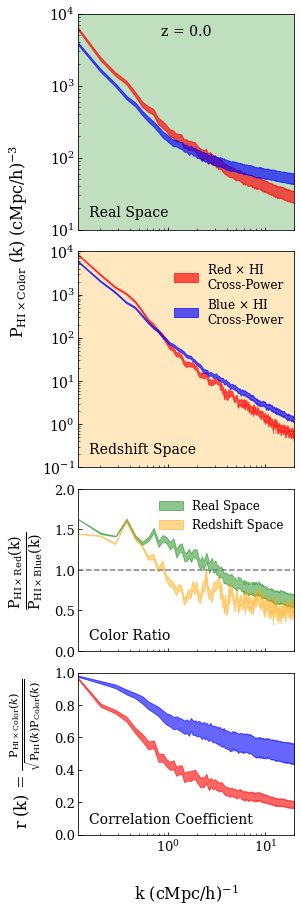

In [11]:
fg.plot()
fg.axes[2,0].plot(fg.axes[2, 0].get_xlim(), [1,1], linestyle = '--', color = 'gray')
fg.fig

Basic red vs blue plot for z = 0.0. I think going forward I'm not going to smooth the color ratio - I don't think it gained that much anyway. 

In [12]:
fg.save("rvb_fiducial_99.png")
fg.save(DRAFTPATH%"rvb_fiducial_99.pdf")

In [8]:
# %%capture
# ip['figrid_process'] = 'fill'
# ip['color'] = ['red', 'blue']
# ip['space'] = ['real', 'redshift']
# ip['HI_fieldname'] = 'vn_hiptl'
# fg = ds.figrid('color', 'space', 'snapshot', ip, figrid_args = {'hspace': 0.2}, figkw = {'dpi':400})


In [9]:
# fg.spineArgs({'edgecolor':'white'})
# # fg.setDefaultTicksParams()
# falpha = 0.25
# fg.rowLabelArgs(textKwargs = {'color':'w'})
# fg.colLabelArgs([''], textKwargs = {'color':'w'})
# fg.axisArgs({'ylim':(1e1, 1e4), 'facecolor':'black'}, ['real'])
# fg.axisArgs({'ylim':(1e-1, 1e4), 'facecolor':'black'}, ['redshift'])
# fg.axisArgs({'yscale':'linear', 'ylim':(0, 2), 'facecolor':'black'}, ['ratio'])
# fg.legendArgs({'labelcolor':'white'}, (slice(None),0))
# fg.setXLabel(XLAB, txtargs = {'fontsize':16, 'ha':'center', 'color':'white'})
# fg.tickArgs({'color':'white', 'labelcolor':'white'})
# sub = r'\rm{Gal} \times \rm{HI}'
# ypos = [0, 1 - (fg.panel_length + 0.5*fg.hspace[0])/fg.figsize[1]]
# fg.setYLabel(YLAB%sub, ypos, txtargs = {'fontsize':16, 'color':'w'})
# ypos = [0, (fg.panel_heights[-1] * 0.5 + fg.yborder[1])/fg.figsize[1]]
# fg.setYLabel(r"P$_{\rm{Red}}$ (k) / P$_{\rm{Blue}}$ (k)", ypos, txtargs = {'fontsize':16, 'color':'w'})
# fg.figArgs({'facecolor':'black'})
# fg.plotArgs({'color':'red'}, {'alpha':1.0})
# fg.plotArgs({'color':'blue'}, {'alpha':1})

In [10]:
# fg.plot()
# fg.axes[2,0].plot(fg.axes[2, 0].get_xlim(), [1,1], linestyle = '--', color = 'gainsboro')
# fg.fig

In [11]:
# fg.save('HIxGALAXY_presentation_dark.png')

In [12]:
# ip['color'] = 'ratio'
# fg = ds.figrid('color', 'space', '', ip, figrid_args = {'panel_length' : 3})
# fg.spineArgs({'edgecolor':'white'})
# # fg.setDefaultTicksParams()
# falpha = 0.25
# fg.rowLabelArgs(textKwargs = {'color':'w'})
# fg.colLabelArgs([''], textKwargs = {'color':'w'})
# fg.axisArgs({'facecolor':'black', 'yscale':'linear', 'ylim':(0,2), 'ylabel':r"P$_{\rm{Red}}$ (k) / P$_{\rm{Blue}}$ (k)",
#             'xlabel':XLAB})
# # fg.axisArgs({'yscale':'linear', 'ylim':(0, 2), 'facecolor':'black'}, ['ratio'])
# fg.legendArgs({'labelcolor':'white'}, (slice(None),0))
# fg.setXLabel(XLAB, txtargs = {'fontsize':16, 'ha':'center', 'color':'white'})
# fg.tickArgs({'color':'white', 'labelcolor':'white'})
# sub = r'\rm{Gal} \times \rm{HI}'
# ypos = [0, 1 - (fg.panel_length + 0.5*fg.hspace[0])/fg.figsize[1]]
# fg.setYLabel(r"P$_{\rm{Red}}$ (k) / P$_{\rm{Blue}}$ (k)", ypos, txtargs = {'fontsize':16, 'color':'w'})
# ypos = [0, (fg.panel_heights[-1] * 0.5 + fg.yborder[1])/fg.figsize[1]]
# fg.setYLabel(r"P$_{\rm{Red}}$ (k) / P$_{\rm{Blue}}$ (k)", ypos, txtargs = {'fontsize':16, 'color':'w'})
# fg.figArgs({'facecolor':'black'})
# fg.plotArgs({'color':'ratio'}, {'color')
# fg.plot()

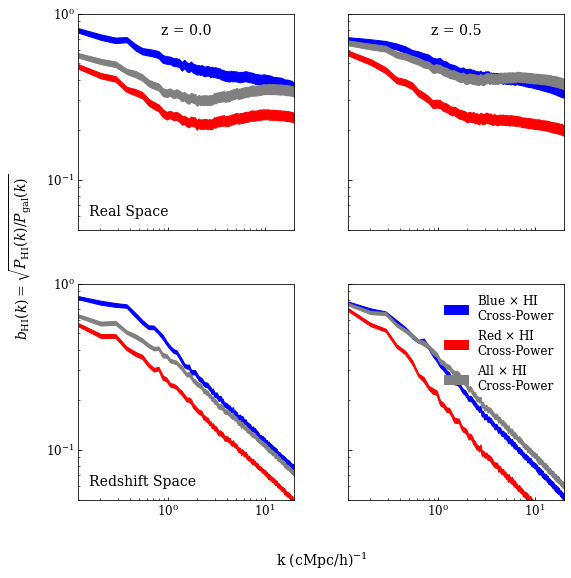

In [15]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'theory_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'galaxy'}

fg = ds.figrid('color', 'space', 'snapshot', ip)
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-gal}} (k) / P_{\mathrm{gal}} (k)$'


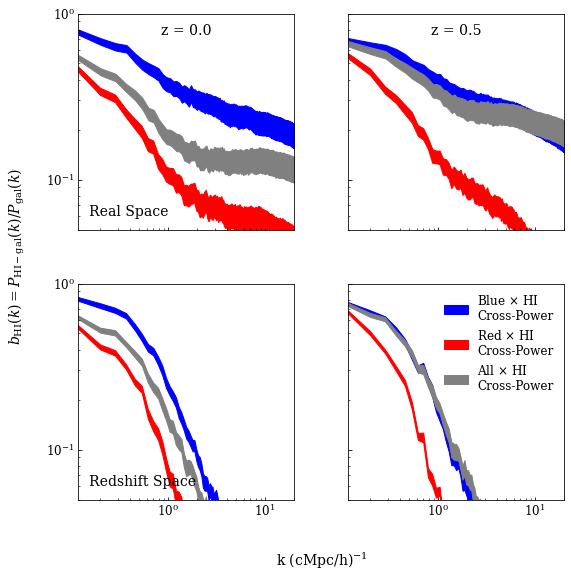

In [16]:
fg.autoFill()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(THBIAS, txtargs = {'fontsize':14})
fg.legendArgs({}, (1,1))
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.plot()
fg.save("HI-galaxy_theory_bias_color.png")
fg.fig

In [17]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'corr_coef', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial'}

fg = ds.figrid('color', 'space', 'snapshot', ip)
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-gal}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{gal}}(k)}}$'

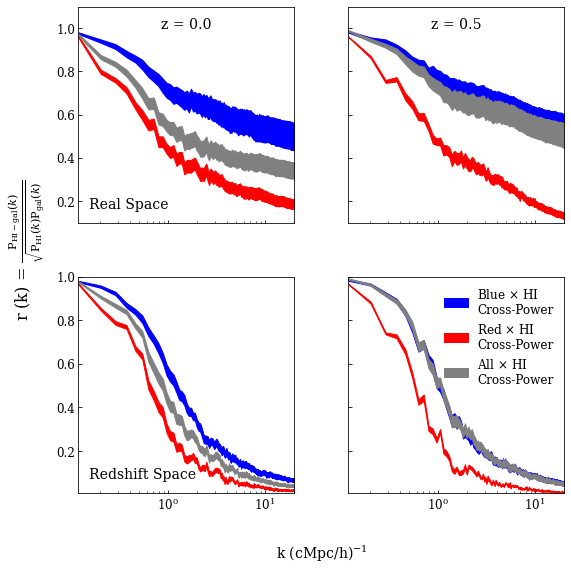

In [18]:
fg.autoFill()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(CORRCOEF, txtargs = {'fontsize':16})
fg.setDefaultTicksParams()
# fg.matchLimits()
fg.axisArgs({'yscale':'linear'})
fg.axisArgs({'ylim':(1e-1, 1.1)}, ['real'])
fg.axisArgs({'ylim':(1e-2, 1)}, ['redshift'])
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("HI-galaxy_corr_coef_color.png")
fg.fig

# Redshift Evolution of Bias

In [19]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial'}
fg = ds.figrid('snapshot', 'space', 'color', ip)

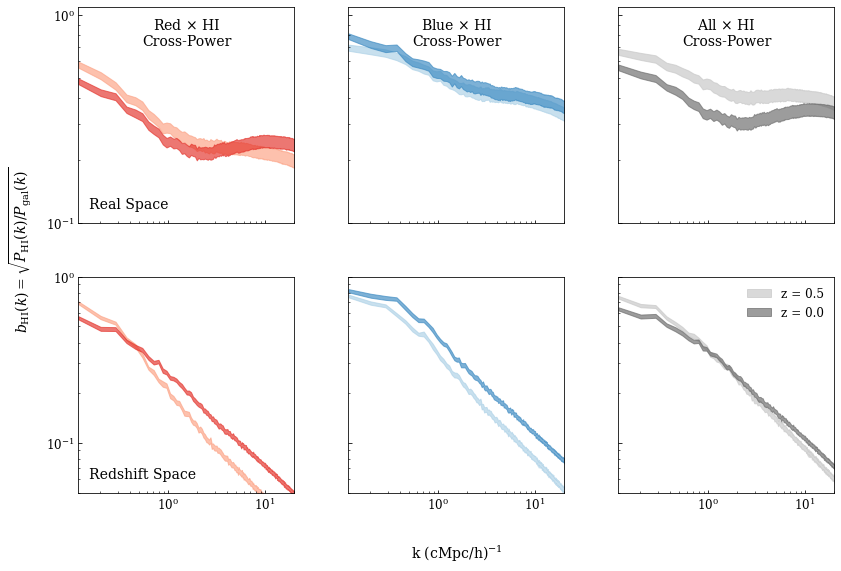

In [20]:
colors = ip['color']
snapshots = ip['snapshot']
snapshots.reverse()
resolvedcols = seaborn.color_palette('Greys', len(snapshots))
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
plotcolors = {'resolved':resolvedcols, 'blue':bluecols, 'red':redcols}
for c in colors:
    for s in range(len(snapshots)):
        fip = {'color':c, 'snapshot':snapshots[s]}
        fg.fill(fip, {'alpha':0.65, 'color':plotcolors[c][s]})
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(OBSBIAS, txtargs = {'fontsize':14})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)}, ['redshift'])
fg.axisArgs({'ylim':(1e-1, 1.1)}, ['real'])
fg.legendArgs({}, (1,2))
fg.plot()
fg.save("HI-galaxy_obs_bias_color_zevo.png")
fg.fig

In [21]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'theory_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'galaxy'}

fg = ds.figrid('snapshot', 'space', 'color', ip)

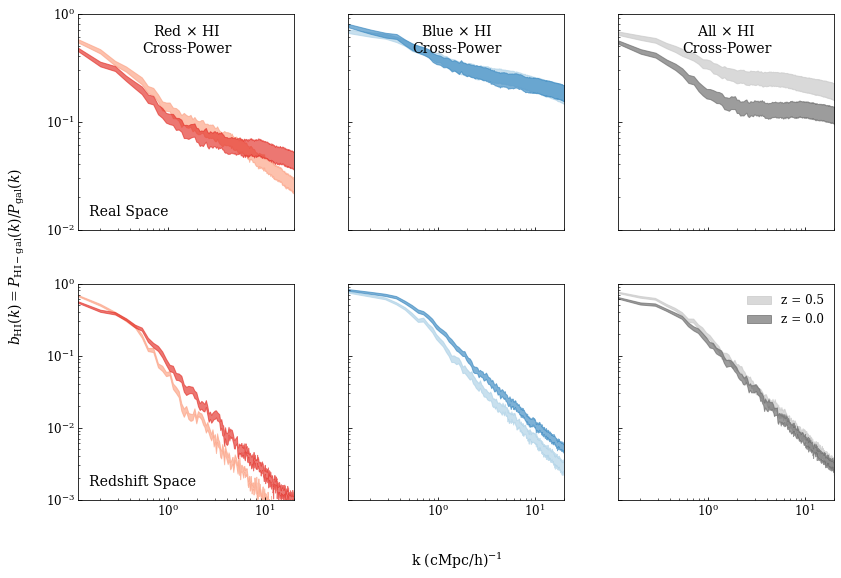

In [22]:
colors = ip['color']
snapshots = ip['snapshot']
snapshots.reverse()
resolvedcols = seaborn.color_palette('Greys', len(snapshots))
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
plotcolors = {'resolved':resolvedcols, 'blue':bluecols, 'red':redcols}
for c in colors:
    for s in range(len(snapshots)):
        fip = {'color':c, 'snapshot':snapshots[s]}
        fg.fill(fip, {'alpha':0.65, 'color':plotcolors[c][s]})
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(THBIAS, txtargs = {'fontsize':14})
fg.legendArgs({}, (1,2))
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(1e-2, 1)}, ['real'])
fg.axisArgs({'ylim':(1e-3, 1)}, ['redshift'])
fg.plot()
fg.save("HI-galaxy_theory_bias_color_zevo.png")
fg.fig

In [23]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'corr_coef', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial'}

fg = ds.figrid('snapshot', 'space', 'color', ip)

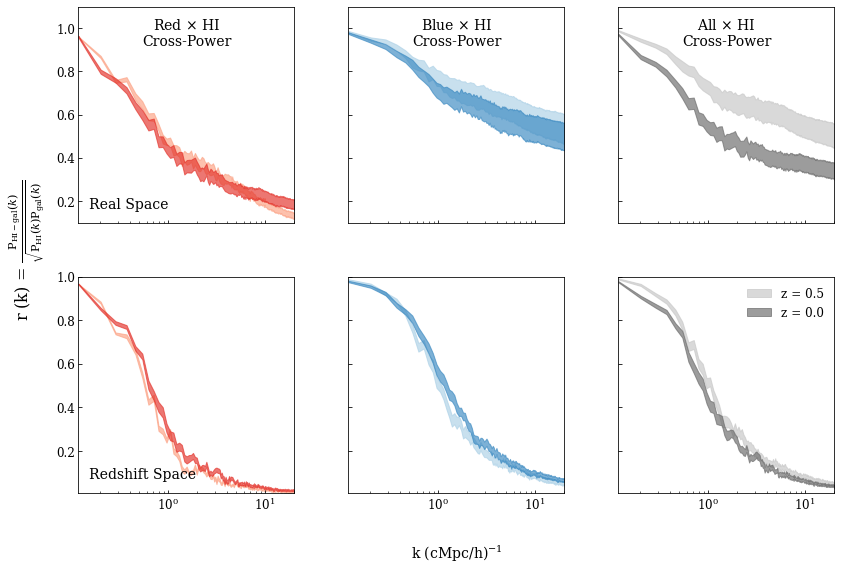

In [24]:
colors = ip['color']
snapshots = ip['snapshot']
snapshots.reverse()
resolvedcols = seaborn.color_palette('Greys', len(snapshots))
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
plotcolors = {'resolved':resolvedcols, 'blue':bluecols, 'red':redcols}
for c in colors:
    for s in range(len(snapshots)):
        fip = {'color':c, 'snapshot':snapshots[s]}
        fg.fill(fip, {'alpha':0.65, 'color':plotcolors[c][s]})

fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(CORRCOEF, txtargs = {'fontsize':16})
fg.setDefaultTicksParams()
# fg.matchLimits()
fg.axisArgs({'yscale':'linear'})
fg.axisArgs({'ylim':(1e-1, 1.1)}, ['real'])
fg.axisArgs({'ylim':(1e-2, 1)}, ['redshift'])
fg.legendArgs({}, (1,2))
fg.plot()
fg.save("HI-galaxy_corr_coef_color_zevo.png")
fg.fig

# HI by Galaxy bias

In [28]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['hisubhalo'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'HI_res':'diemer',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial'}
fg = ds.figrid('color', 'space', 'snapshot', ip)

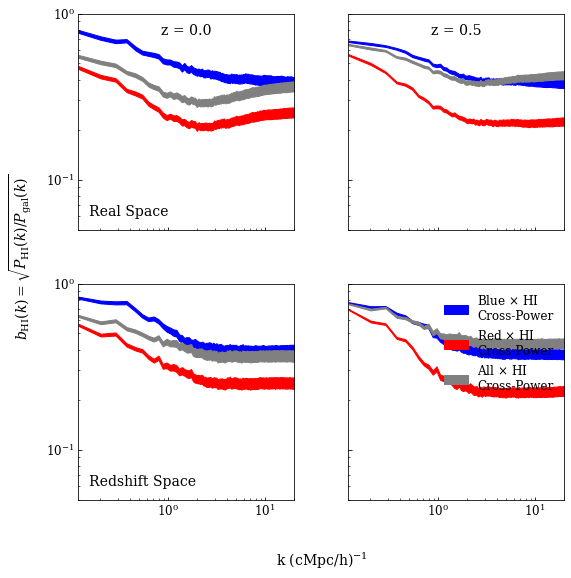

In [29]:
fg.autoFill()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(OBSBIAS, txtargs = {'fontsize':14})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("hisubhalo-galaxy_obs_bias_color.png")
fg.fig

In [30]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['hisubhalo'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'HI_res':'diemer',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'theory_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', 'space', 'snapshot', ip)

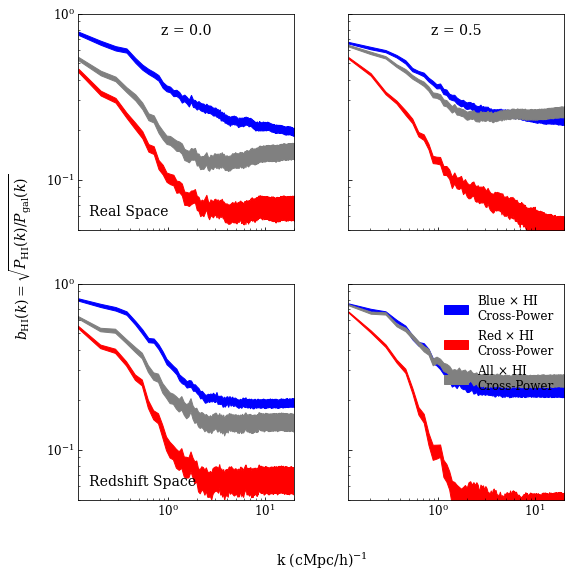

In [31]:
fg.autoFill()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(OBSBIAS, txtargs = {'fontsize':14})
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("hisubhalo-galaxy_theory_bias_color.png")
fg.fig

In [32]:
%%capture
ip = {'is_auto':False, 'HI_fieldname':['hisubhalo'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100', 'HI_res':'diemer',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'corr_coef', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial'}
fg = ds.figrid('color', 'space', 'snapshot', ip)

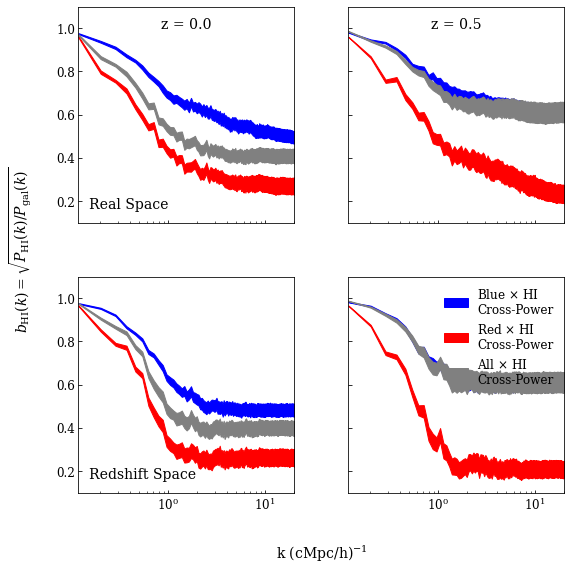

In [33]:
fg.autoFill()
fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(OBSBIAS, txtargs = {'fontsize':14})
fg.setDefaultTicksParams()
fg.axisArgs({'yscale':'linear', 'ylim':(.1, 1.1)})
fg.legendArgs({}, (1,1))
fg.plot()
fg.save("hisubhalo-galaxy_corr_coef_color.png")
fg.fig

# Making HI-Galaxy Correlation Coefficient Plots

The row values for : ['no key found']
The column values for color: ['red', 'blue', 'resolved']


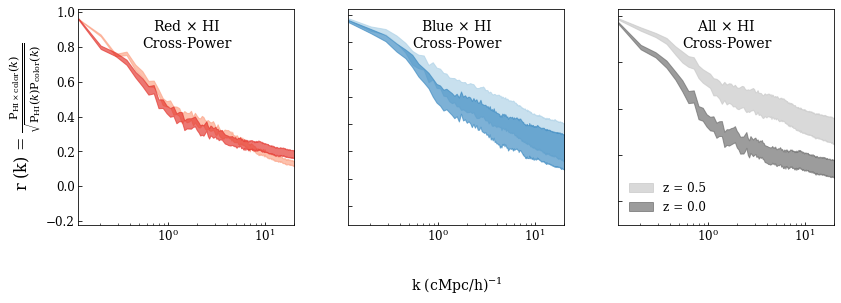

In [58]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'corr_coef', 'snapshot':[99, 67], 'space':'real',
     'path':'fiducial'}

fg = ds.figrid('snapshot', '', 'color', ip)
colors = ip['color']
snapshots = ip['snapshot']
snapshots.reverse()
resolvedcols = seaborn.color_palette('Greys', len(snapshots))
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
plotcolors = {'resolved':resolvedcols, 'blue':bluecols, 'red':redcols}
for c in colors:
    for s in range(len(snapshots)):
        fip = {'color':c, 'snapshot':snapshots[s]}
        fg.fill(fip, {'alpha':0.65, 'color':plotcolors[c][s]})

fg.setXLabel(XLAB, txtargs = {'fontsize':14})
fg.setYLabel(CORRCOEF, txtargs = {'fontsize':16})
fg.setDefaultTicksParams()
fg.axisArgs({'yscale':'linear', 'ylim':(0,1)})
fg.legendArgs({'loc':'lower left'}, (0, 2))
fg.plot()